## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice.
mice = combined_df["Mouse ID"].value_counts()
mice_count = len(mice)
mice_count

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df["Mouse ID"].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data["Mouse ID"].value_counts()
clean_mice_count = len(clean_mice)
clean_mice_count

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regimen_mean

regimen_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regimen_median

regimen_variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regimen_variance

regimen_std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regimen_std

regimen_sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_sem

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_function = clean_data.groupby('Drug Regimen')
groupby_stats_table = single_function.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
groupby_stats_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

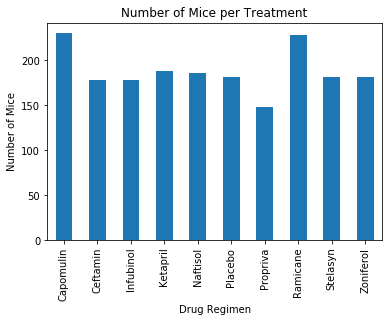

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_count = single_function['Mouse ID'].count()
regimen_count.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

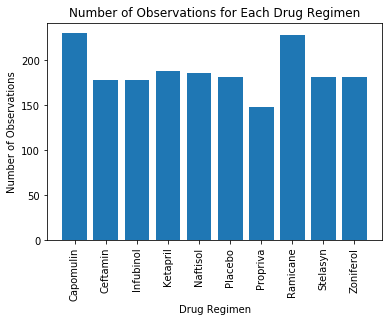

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_list = regimen_count.index.to_list()
best_regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']

plt.bar(regimen_list, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")
plt.xticks(rotation='vertical')


In [46]:
# Find mice count by gender
gender = combined_df.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(gender.size())

# Make dataframe for total count by gender
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Find percentage of female vs male mice
mouse_gender["Percentage of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()*100))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

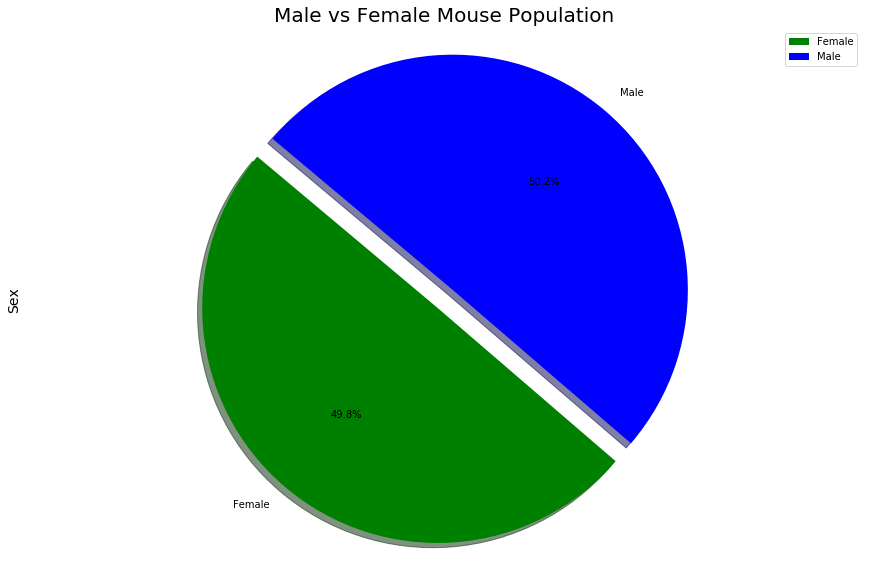

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot(kind="pie", y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)


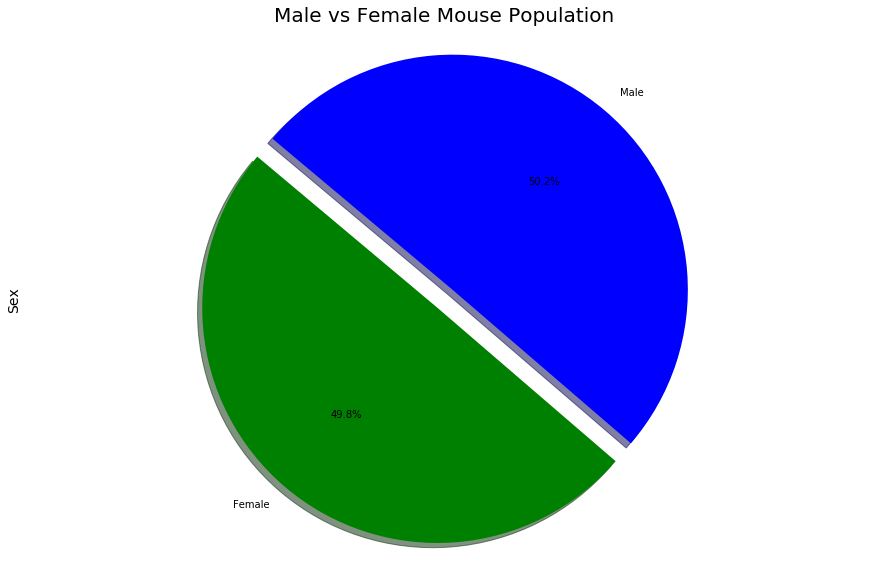

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Values
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['green', 'blue']
explode = (0.1, 0)

# Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = combined_df.loc[combined_df['Drug Regimen'].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, combined_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volumes.append(tumor_vol_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



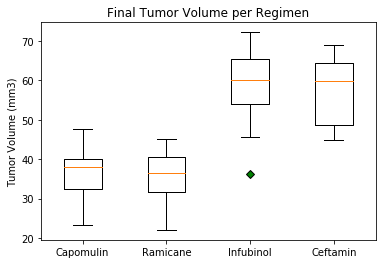

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

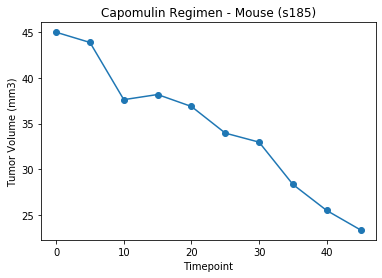

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
find_mouse = combined_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID']=='s185')]
find_mouse

plt.plot(find_mouse['Timepoint'], find_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - Mouse (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")


(35, 46)

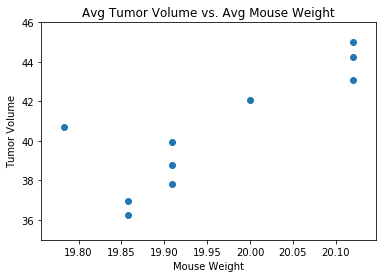

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg_tumor_wgt = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin'].groupby(combined_df['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_avg_tumor_wgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

## Correlation and Regression

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


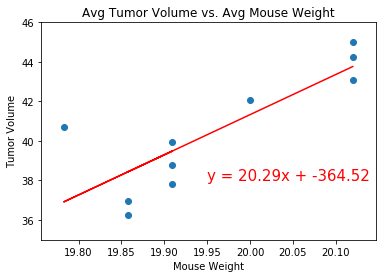

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(atv,amw)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amw,atv)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

# plot line with scatter
atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

# calculate regression values
reg_values = amw * slope + intercept
plt.plot(amw, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.show()